# Credit card risk analysis

This is an analysis performed using a dataset obtained from Kaggle: A Credit Card Dataset for Machine Learning

The purpose of this analysis is learning.

The analysis is organized as follows:

+ Importing data

+ Tidying: join, clean, transformation

+ Create label

+ EDA

+ Prepare for modeling: dealing with unbalanced data

+ Algorithms

+ Logistic regression

+ Decision Tree

## Importing data

There are two sources (tables) of data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data1 = pd.read_csv('./archive/application_record.csv')
data2 = pd.read_csv('./archive/credit_record.csv')

In [3]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [4]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


## Tidying: join, clean, transform

In [5]:
# there are 2 sources/tables
# they should be joined by ID
df_merged = pd.merge(data2, data1, on="ID", how='inner')

In [6]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777715 entries, 0 to 777714
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   777715 non-null  int64  
 1   MONTHS_BALANCE       777715 non-null  int64  
 2   STATUS               777715 non-null  object 
 3   CODE_GENDER          777715 non-null  object 
 4   FLAG_OWN_CAR         777715 non-null  object 
 5   FLAG_OWN_REALTY      777715 non-null  object 
 6   CNT_CHILDREN         777715 non-null  int64  
 7   AMT_INCOME_TOTAL     777715 non-null  float64
 8   NAME_INCOME_TYPE     777715 non-null  object 
 9   NAME_EDUCATION_TYPE  777715 non-null  object 
 10  NAME_FAMILY_STATUS   777715 non-null  object 
 11  NAME_HOUSING_TYPE    777715 non-null  object 
 12  DAYS_BIRTH           777715 non-null  int64  
 13  DAYS_EMPLOYED        777715 non-null  int64  
 14  FLAG_MOBIL           777715 non-null  int64  
 15  FLAG_WORK_PHONE  

In [7]:
df_merged.head()

,ID,MONTHS_BALANCE,STATUS,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,0,C,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008804,-1,C,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008804,-2,C,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
3,5008804,-3,C,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
4,5008804,-4,C,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0


In [8]:
df_merged.describe()

,ID,MONTHS_BALANCE,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
count,7.777150e+05,777715.000000,777715.000000,7.777150e+05,777715.000000,777715.000000,777715.0,777715.000000,777715.000000,777715.000000,777715.000000
mean,5.078743e+06,-19.373564,0.428082,1.885348e+05,-16124.937046,57775.825016,1.0,0.231818,0.300965,0.091675,2.208837
std,4.180442e+04,14.082208,0.745755,1.016225e+05,4104.304018,136471.735391,0.0,0.421993,0.458678,0.288567,0.907380
min,5.008804e+06,-60.000000,0.000000,2.700000e+04,-25152.000000,-15713.000000,1.0,0.000000,0.000000,0.000000,1.000000
25%,5.044568e+06,-29.000000,0.000000,1.215000e+05,-19453.000000,-3292.000000,1.0,0.000000,0.000000,0.000000,2.000000
50%,5.069530e+06,-17.000000,0.000000,1.620000e+05,-15760.000000,-1682.000000,1.0,0.000000,0.000000,0.000000,2.000000
75%,5.115551e+06,-8.000000,1.000000,2.250000e+05,-12716.000000,-431.000000,1.0,0.000000,1.000000,0.000000,3.000000
max,5.150487e+06,0.000000,19.000000,1.575000e+06,-7489.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000


In [9]:
c=(777715-537667)/777715
print('There is a significant amount of null data in one categorical variable: Occupation type: {}'.format(c))
# further explore it to decide what to do

There is a significant amount of null data in one categorical variable: Occupation type: 0.30865805597166057


In [10]:
pd.unique(df_merged['OCCUPATION_TYPE'])

array([nan, 'Security staff', 'Sales staff', 'Accountants', 'Laborers',
       'Managers', 'Drivers', 'Core staff', 'High skill tech staff',
       'Cleaning staff', 'Private service staff', 'Cooking staff',
       'Low-skill Laborers', 'Medicine staff', 'Secretaries',
       'Waiters/barmen staff', 'HR staff', 'Realty agents', 'IT staff'],
      dtype=object)

In [11]:
df_merged.groupby('OCCUPATION_TYPE')['ID'].count()
# not particularly imbalanced, and the occupations are very different from each other
# maybe create a level 'Undefined' in order not to lose that many observations

OCCUPATION_TYPE
Accountants               27223
Cleaning staff            11399
Cooking staff             13416
Core staff                77112
Drivers                   47678
HR staff                   1686
High skill tech staff     31768
IT staff                   1319
Laborers                 131572
Low-skill Laborers         3623
Managers                  67738
Medicine staff            26691
Private service staff      6714
Realty agents              1260
Sales staff               70362
Secretaries                3149
Security staff            12400
Waiters/barmen staff       2557
Name: ID, dtype: int64

In [12]:
df_merged["OCCUPATION_TYPE"].fillna("Undefined", inplace=True)

In [13]:
df_merged.groupby('OCCUPATION_TYPE')['ID'].count()


OCCUPATION_TYPE
Accountants               27223
Cleaning staff            11399
Cooking staff             13416
Core staff                77112
Drivers                   47678
HR staff                   1686
High skill tech staff     31768
IT staff                   1319
Laborers                 131572
Low-skill Laborers         3623
Managers                  67738
Medicine staff            26691
Private service staff      6714
Realty agents              1260
Sales staff               70362
Secretaries                3149
Security staff            12400
Undefined                240048
Waiters/barmen staff       2557
Name: ID, dtype: int64

## Feature engineering: Create label

According to research, Days Past Due (DPD) is a key information in credit analysis and reports.

> "Days Past Due (DPD) is a banking term used to indicate the number of days that have elapsed since the due date of a particular credit account. It is a key metric that lenders use to figure out if someone is creditworthy and how much credit risk they pose. A high DPD means that the borrower has been late with payments in the past, which can hurt their credit score and make it harder for them to get credit in the future. DPD is the number of days that have elapsed since the due date of a particular credit account.

> When evaluating your credit report, lenders usually pay close attention to accounts that are past due by more than 30 days. If you have these kinds of accounts, lenders may be less likely to give you a loan or ask for more information before making a decision.

> A good Days Past Due is relative to the type of credit account and payment terms associated with it. Typically, for a credit card account, a DPD of less than 30 days is considered good, while for a home loan, a DPD of less than 90 days is considered good."

Li and Liao (2011), on a study of a credit scoring model for credit card - on a dataset of 27 variables containing personal and family information, personal credit card consumption record and bank account information - point that the first step in building a credit scoring model is defining the default event.

As in the study, and according to the Basel II Capital Accord, the default relates to the "bad" event. As pointed by the latter authors, in the credit scoring the focus is usually on the prediction of the default ("bad" or also called event) instead of the non-default("good" or non-event).

Still according to those authors:

> "Default risk is the uncertainty regarding a borrower's ability to service its debts or obligations. It is quantified by measuring the probability of non-default. Probability of non-default reflects the probabilistic assessment of the likelihood that the obligator or counterpart will not default on its contractual obligation within the period defined by Basel II"

In [14]:
pd.unique(df_merged['STATUS'])
# 0: 1-29 days past due / 1: 30-59 days past due / 2: 60-89 days overdue /
# 3: 90-119 days overdue / 4: 120-149 days overdue / 5: Overdue or bad debts, write-offs for more than 150 days 
# C: paid off that month / X: No loan for the month
# Adapt it to a numerical columns to check correlation

# Define a mapping dictionary for letter-to-number conversion
mapping = {'C': 100, 'X': 00, '0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5}  
df_merged['STATUS_int'] = df_merged['STATUS'].map(mapping)

Considering that for home loan a due period of up to 90 days is in below risk, and for credit card it is a period of 30 days, I'll work with 60 days as threshold, a middle-term value.

I'll create a variable to represent the dependent variable as 0 or 1, non-default or default events.

In [15]:
# 0: non-default, non-event or good
# 1: default, event or bad
# Values to map to 1
values_to_map_to_1 = [2,3,4,5]  # Add more values as needed

# Create the binary column based on the mapping
df_merged['label'] = df_merged['STATUS_int'].apply(lambda x: 1 if x in values_to_map_to_1 else 0)


In [16]:
# drop the ones that do not have loan for the month
df_merged = df_merged.query('STATUS != "X"')

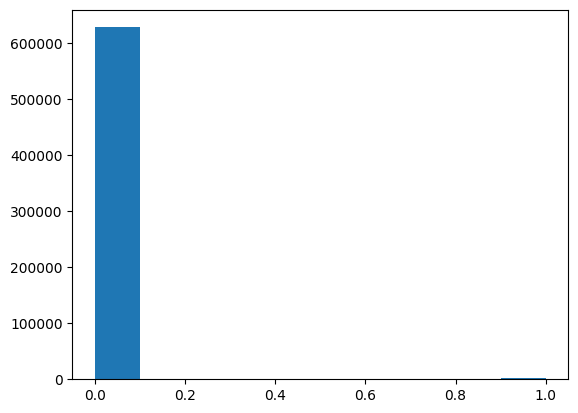

In [17]:
plt.hist(df_merged['label'])
plt.show()
# it is highly imbalanced

## EDA

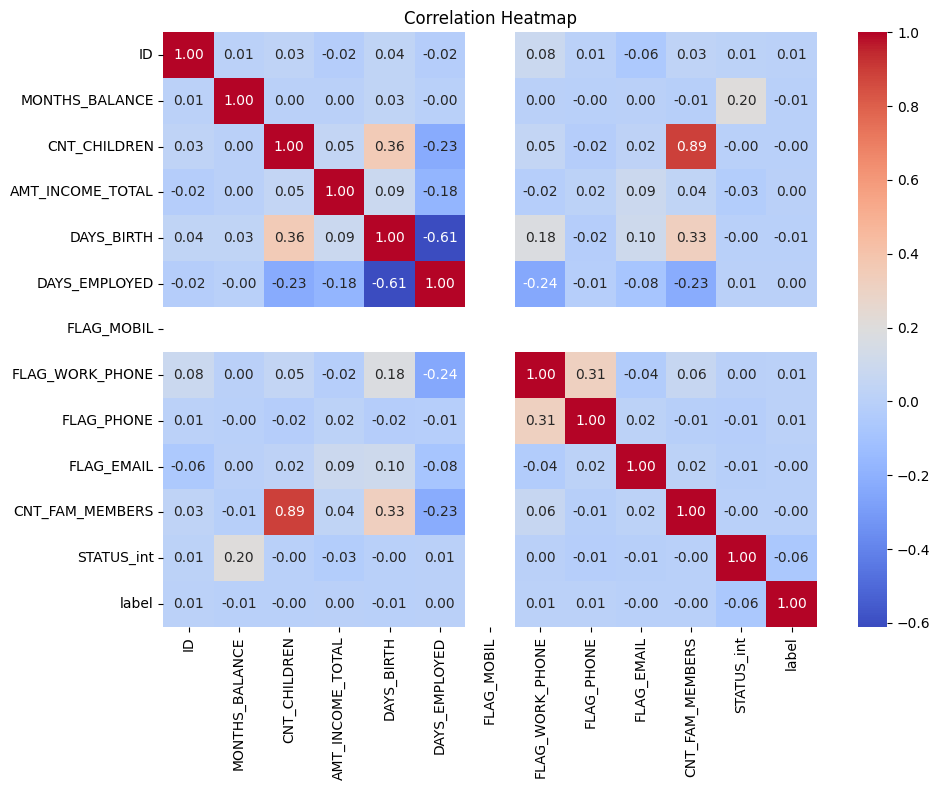

In [18]:
numerical_df = df_merged.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numerical_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.xticks()
plt.tight_layout()

plt.show()

The correlation analysis did not show any strong correlations, specially considering the STATUS_int variable, probably the most "key variable" in this dataset.
Also, most part of the correlations are close to zero.

Thus, an approach like PCA would probably yield poor results.

In [19]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 631765 entries, 0 to 777714
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   631765 non-null  int64  
 1   MONTHS_BALANCE       631765 non-null  int64  
 2   STATUS               631765 non-null  object 
 3   CODE_GENDER          631765 non-null  object 
 4   FLAG_OWN_CAR         631765 non-null  object 
 5   FLAG_OWN_REALTY      631765 non-null  object 
 6   CNT_CHILDREN         631765 non-null  int64  
 7   AMT_INCOME_TOTAL     631765 non-null  float64
 8   NAME_INCOME_TYPE     631765 non-null  object 
 9   NAME_EDUCATION_TYPE  631765 non-null  object 
 10  NAME_FAMILY_STATUS   631765 non-null  object 
 11  NAME_HOUSING_TYPE    631765 non-null  object 
 12  DAYS_BIRTH           631765 non-null  int64  
 13  DAYS_EMPLOYED        631765 non-null  int64  
 14  FLAG_MOBIL           631765 non-null  int64  
 15  FLAG_WORK_PHONE      6

In [20]:
# print(pd.unique(df_merged['NAME_INCOME_TYPE']))
# print(pd.unique(df_merged['CODE_GENDER']))
# print(pd.unique(df_merged['FLAG_OWN_CAR']))
# print(pd.unique(df_merged['FLAG_OWN_REALTY']))
# print(pd.unique(df_merged['NAME_EDUCATION_TYPE']))
# print(pd.unique(df_merged['NAME_FAMILY_STATUS']))
# print(pd.unique(df_merged['NAME_HOUSING_TYPE']))
# print(pd.unique(df_merged['OCCUPATION_TYPE']))

There is a lot of information on the object cols, encode them to be able to analyse it together with the other numerical data.


In [21]:
from sklearn.preprocessing import LabelEncoder

df_model = df_merged.copy()

label_encoder = LabelEncoder()

object_columns = df_model.select_dtypes(include=['object'])

for column in object_columns:
    df_model[column] = label_encoder.fit_transform(df_model[column])


In [22]:
df_merged.head()

,ID,MONTHS_BALANCE,STATUS,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,...,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,STATUS_int,label
0,5008804,0,C,M,Y,Y,0,427500.0,Working,Higher education,...,-12005,-4542,1,1,0,0,Undefined,2.0,100,0
1,5008804,-1,C,M,Y,Y,0,427500.0,Working,Higher education,...,-12005,-4542,1,1,0,0,Undefined,2.0,100,0
2,5008804,-2,C,M,Y,Y,0,427500.0,Working,Higher education,...,-12005,-4542,1,1,0,0,Undefined,2.0,100,0
3,5008804,-3,C,M,Y,Y,0,427500.0,Working,Higher education,...,-12005,-4542,1,1,0,0,Undefined,2.0,100,0
4,5008804,-4,C,M,Y,Y,0,427500.0,Working,Higher education,...,-12005,-4542,1,1,0,0,Undefined,2.0,100,0


In [23]:
df_model.head()

,ID,MONTHS_BALANCE,STATUS,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,...,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,STATUS_int,label
0,5008804,0,6,1,1,1,0,427500.0,4,1,...,-12005,-4542,1,1,0,0,17,2.0,100,0
1,5008804,-1,6,1,1,1,0,427500.0,4,1,...,-12005,-4542,1,1,0,0,17,2.0,100,0
2,5008804,-2,6,1,1,1,0,427500.0,4,1,...,-12005,-4542,1,1,0,0,17,2.0,100,0
3,5008804,-3,6,1,1,1,0,427500.0,4,1,...,-12005,-4542,1,1,0,0,17,2.0,100,0
4,5008804,-4,6,1,1,1,0,427500.0,4,1,...,-12005,-4542,1,1,0,0,17,2.0,100,0


In [24]:
# df_model.info()

# Hopefully, now the correlation matrix can show better result



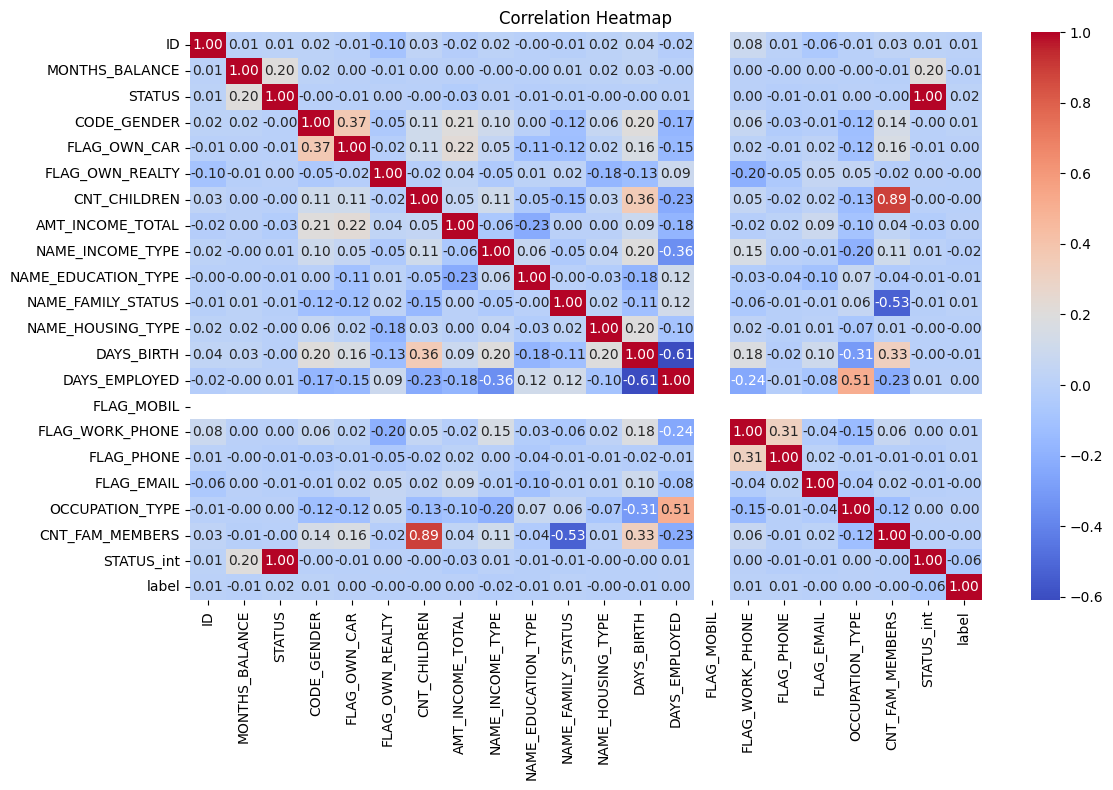

In [25]:
correlation_matrix = df_model.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.xticks()
plt.tight_layout()

plt.show()

Labels are still not correlated with the variables, which can be a problem for some modeling approaches. Some demographic variables have some reasonable correlations, but in general, the whole correlation matrix shows weak values, most around zero.

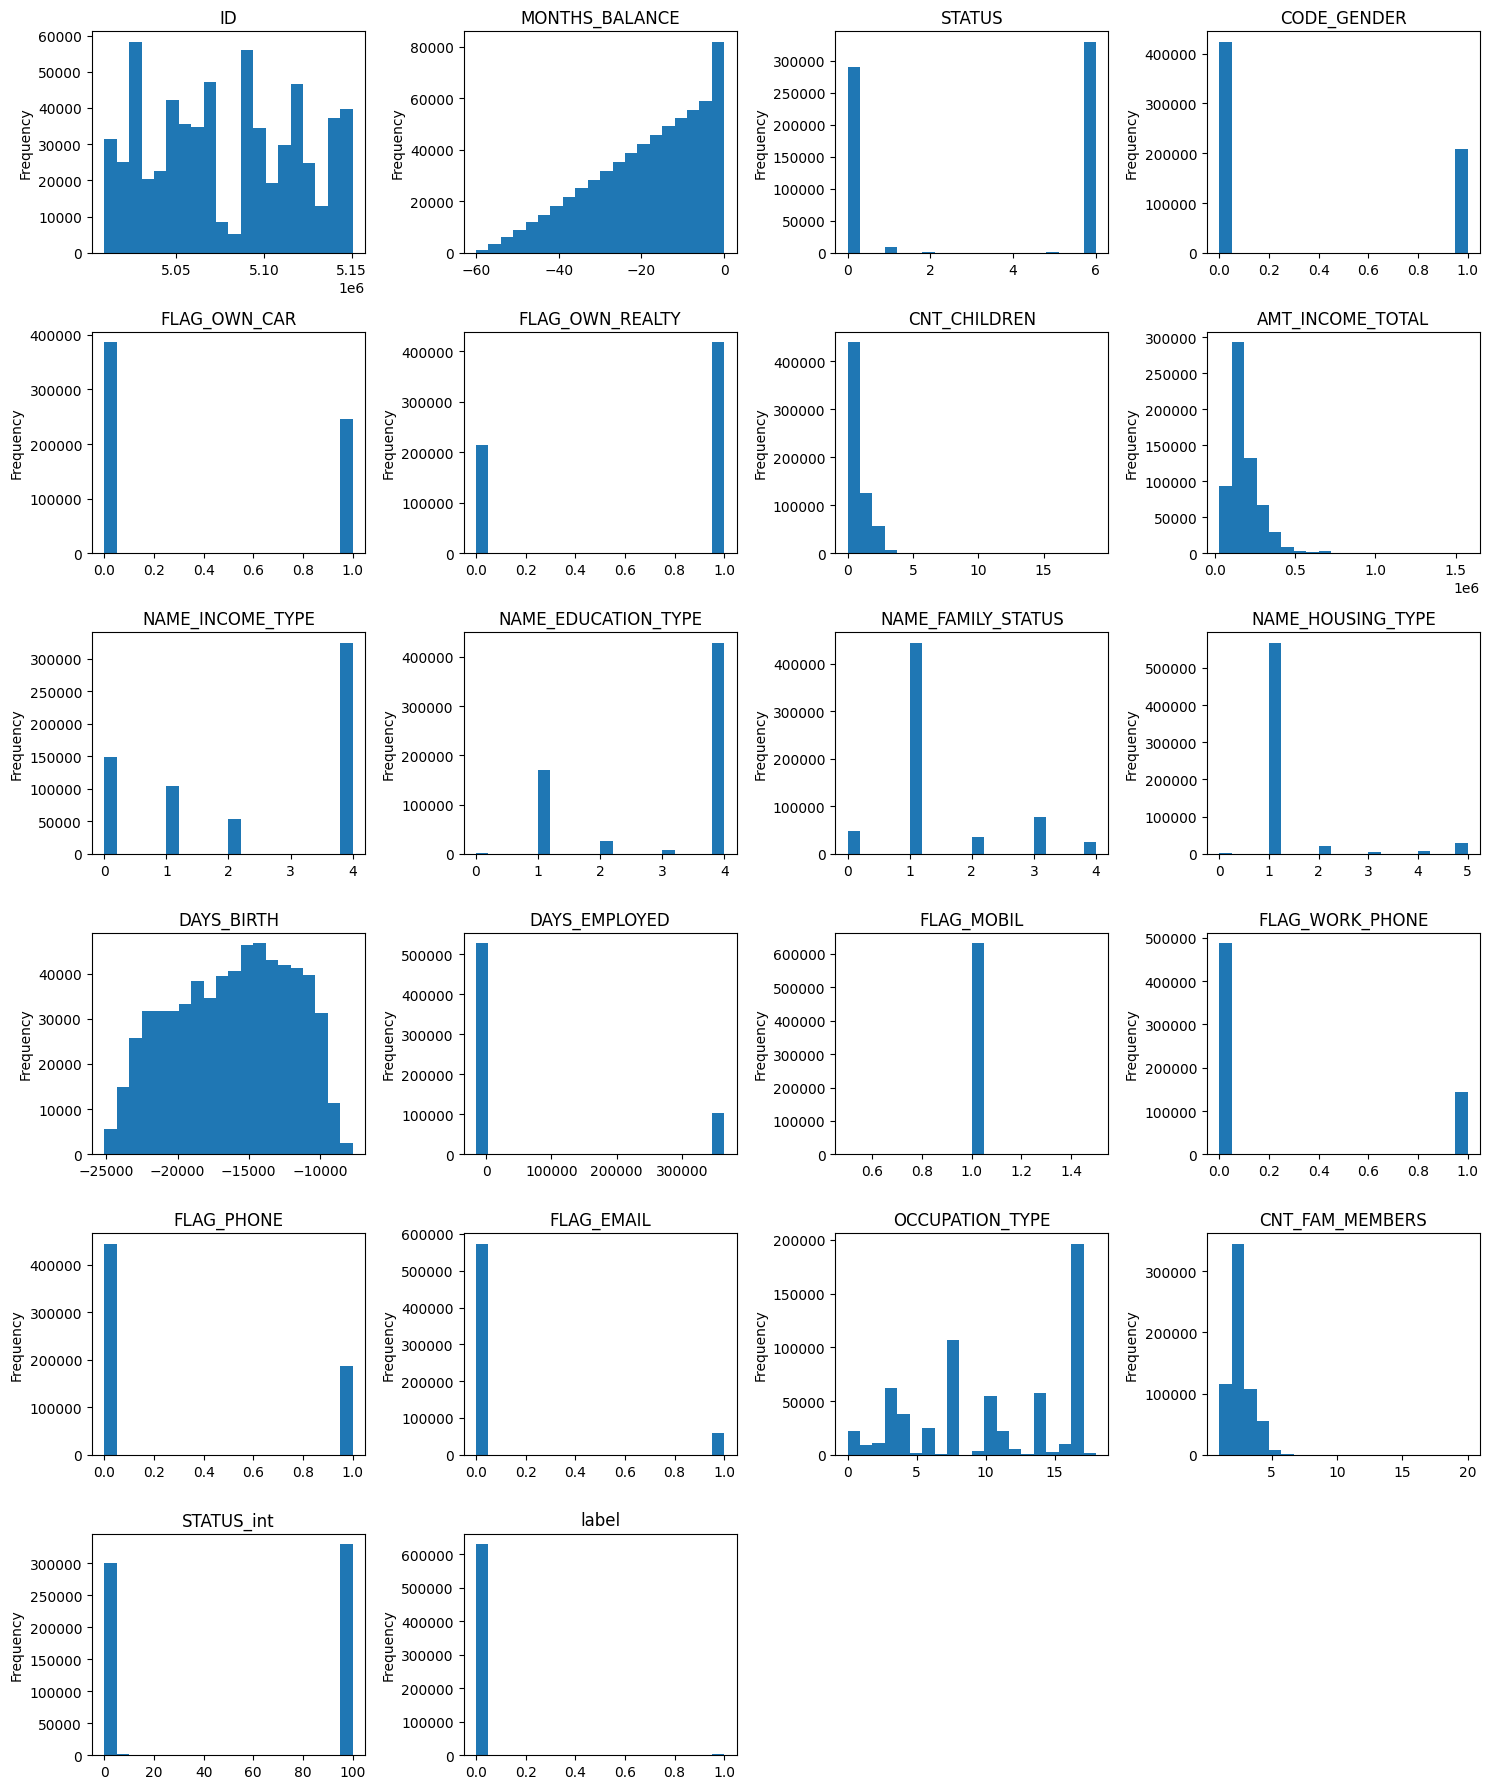

In [26]:
# Determine the number of rows and columns for the grid
num_rows = len(df_model.columns) // 4 + (len(df_model.columns) % 4 > 0)  # Calculate the number of rows
num_cols = 4  # Set the number of columns per row

# Create a figure and an array of axes
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 3 * num_rows))

# Flatten the axes array if necessary (for 1-row grids)
if num_rows == 1:
    axes = np.array(axes)

# Iterate through the DataFrame columns and create histograms
for i, col in enumerate(df_model.columns):
    row = i // num_cols
    col_num = i % num_cols
    ax = axes[row, col_num]

    df_model[col].plot(kind='hist', ax=ax, title=col, bins=20)  # Adjust the number of bins as needed

# Remove any empty subplots
for i in range(len(df_model.columns), num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])

# Adjust layout
plt.tight_layout()
plt.show()


## Prepare for modeling

Data is highly imbalanced, and specifically on the levels of the label with more interest: the event occurrence.

Using the SMOTE technique to deal with the imbalance.

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from collections import Counter

In [28]:
df_model.columns

Index(['ID', 'MONTHS_BALANCE', 'STATUS', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'FLAG_MOBIL',
       'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'STATUS_int', 'label'],
      dtype='object')

In [29]:
# 1: Split the data into training and testing sets
X = df_model.drop(['ID', 'label', 'STATUS', 'STATUS_int'], axis=1)  # Features
y = df_model['label']  # Target variable
print('Original dataset shape %s' % Counter(y))

Original dataset shape Counter({0: 628937, 1: 2828})


In [30]:
smote = SMOTE(random_state=42)  # You can adjust the sampling_strategy if needed
X_resampled, y_resampled = smote.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_resampled))

Resampled dataset shape Counter({0: 628937, 1: 628937})


Standardize the features

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled,y_resampled, 
                                                    stratify=y_resampled, test_size=0.2,
                                                    random_state = 42)

# 2: Standardize the features 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Modeling

### Logistic regression

The first modeling approach is going to be a logistic regression.

This is a widely used technique in this type of analysis.

Below, the log. regression is performed by usin sklearn and statsmodels, getting their results and interpreting them.

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_selection import RFE
from sklearn import metrics
import statsmodels.api as sm

In [33]:
# Fit a logistic regression model
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Model performance evaluation
target_names = ['no-event risk', 'event risk']

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=target_names)



print(f'Accuracy: {accuracy}')
print('---')
print(f'Confusion Matrix:\n{conf_matrix}')
print('---')
print(f'Classification Report:\n{report}')

Accuracy: 0.5926224783861671
---
Confusion Matrix:
[[75382 50406]
 [52080 73707]]
---
Classification Report:
               precision    recall  f1-score   support

no-event risk       0.59      0.60      0.60    125788
   event risk       0.59      0.59      0.59    125787

     accuracy                           0.59    251575
    macro avg       0.59      0.59      0.59    251575
 weighted avg       0.59      0.59      0.59    251575



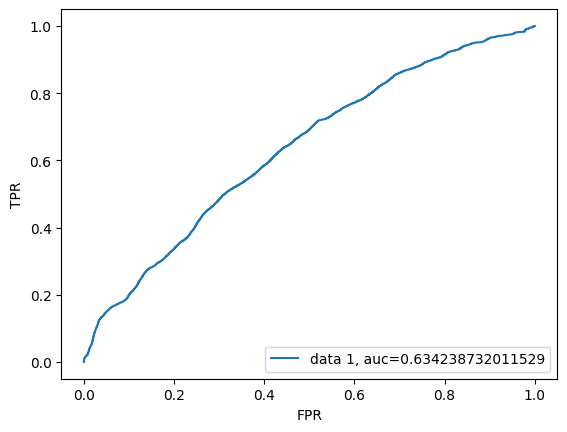

In [41]:
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc=4)
plt.show()

The ROC curve above presents the performance (True positive rates x False positive rates) of the model under different decision tresholds (The threshold is in the context of having a probabilistic model, that returns a number from 0 to 1 for each observation, this value can then be converted into a label, and at what point is considered a label are those different thresholds. Obs: each threshold results in a different confusion matrix). 

It's good to use the curve to assess the trade-off between TPR and FPR: we want to increase the TPR, but we usually see that this increase is also followed by and increase in FPR (not desired). An ideal model would have highest TPR with lowest FPR, so the curve would be concentrade in the upper left corner (in practice: **the model is able to find all the events of risk, and never gives false alarms**).

The worst case, a random model, would have a curve similar to the onse above: a diagonal line, meaning that the model would predict the positive and the negative classes with equal probability.

The score (0.6342..) in this case, summarize the performance of the model under all those different decision tresholds.

In [ ]:
model.coef_
# these are the coefficients fo the features in the decision function
# obs: here, all features are being used, without the recursive elimination

array([[-0.04799626,  0.24325741, -0.12266516, -0.10930907, -0.60752407,
         0.00706419, -0.26809072, -0.1759835 ,  0.41206926, -0.03328296,
        -0.08057647,  0.05020434,  0.        ,  0.10364983,  0.03187381,
        -0.10017636, -0.12228141,  0.71883266]])

In [ ]:
# logistic regression coefficients represent odds ratios and must be converted to probabilities to make them more easily interpretable
# Transforming the logg odds into probabilities

# Update: this type of conversion is probably not a good practice.
# These are the changes in logit of the outcome for a one-unit change in the predictor. 
# but by how much that changes the probability of the outcome depends on the intercept of the model.
# Also, equally important is to know the probability of outcome in the control group,
# and all the following coefficients probabilities would be in relation to that.
[np.exp(x)/(1 + np.exp(x)) for x in model.coef_[0]]

[0.48800323820826813,
 0.5605162310083485,
 0.4693721040155386,
 0.4726999089659722,
 0.35262419674255435,
 0.5017660392963652,
 0.4333758810152758,
 0.45611732052138265,
 0.6015839449091758,
 0.49168002867130656,
 0.47986677397440325,
 0.5125484485135271,
 0.5,
 0.525889282738697,
 0.5079677790120838,
 0.47497683329152635,
 0.4694676822309587,
 0.6723499098559178]

In [35]:
# Feature selection for interpretability (RFE - Recursive Feature Elimination)
rfe = RFE(model, n_features_to_select=5)
rfe.fit(X_train, y_train)

# Selected features after RFE
selected_features = X.columns[rfe.support_]

# Logistic Regression with Statsmodels for interpretability
X_train_rfe = rfe.transform(X_train)
X_train_rfe = sm.add_constant(X_train_rfe)  # Add a constant (intercept)

logit_model = sm.Logit(y_train, X_train_rfe)
result = logit_model.fit()

# Interpretation of the model
print(result.summary())

# Generate intermediate values and plot the logistic curve
X_test_rfe = rfe.transform(X_test)
X_test_rfe = sm.add_constant(X_test_rfe)
y_probs = result.predict(X_test_rfe)

Optimization terminated successfully.
         Current function value: 0.674437
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                  label   No. Observations:              1006299
Model:                          Logit   Df Residuals:                  1006293
Method:                           MLE   Df Model:                            5
Date:                Mon, 23 Oct 2023   Pseudo R-squ.:                 0.02699
Time:                        20:22:57   Log-Likelihood:            -6.7869e+05
converged:                       True   LL-Null:                   -6.9751e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0002      0.002      0.108      0.914      -0.004       0.004
x1             0.1911      0.

In [39]:
# Above, the estimated coefficients are the log odds,
# they can be exponentiated, so it is easier to interpret
np.exp(result.params)

const    1.000220
x1       1.210640
x2       0.557557
x3       0.752945
x4       1.514829
x5       1.991683
dtype: float64

Above, the exponentiation of the estimated coefficients, so it is easier to interpret.
x1, x4 and x5 are above one, meaning that they are postively associated with the label in this data.

Ex: as seen in the model summary, we see that x1 (Gender) has an effect of 0.1911 **on the log odds** of the outcome (the event), **not on the probability**. But this is not very interpretable.
Another way of saying this is: increasin the predictor by 1 unit (in this case, change of one gender to the other) multiplies the odds of having the outcome (event) by exp(0.1911).
Still using the same example, (exp(0.1911)) = 1.21, and this is the **odd ratio** that associates gender to the risk of event.
The male group (1) has 21% (1.21 - 1) more odds of presenting the event than the feamle group.
(male = 1, female = 0)

In [36]:
# Check the selected features from the RFE process
selected_features

Index(['CODE_GENDER', 'CNT_CHILDREN', 'NAME_INCOME_TYPE', 'NAME_FAMILY_STATUS',
       'CNT_FAM_MEMBERS'],
      dtype='object')

Overall, the performance of the log. regression model was not good, with overall accuracy of less than 60%.
This model cannot be used to predict the risk of credit for this dataset. And, although some feature engineering was performed in the dataset (label creation, dealing wiht imbalance and feature selection), at this point, this poor performance may be due to several reasons:

+ the created label is not adequate, i.e., I aimed for it to represent a particular event based on limited knowledge, but it may be the case that the rational for that was not sufficient

+ some feature engineering is neccessary, i.e., techniques that go beyond the default use of these particular features

+ Hyperparameter tuning: it usually helps up to a certain point to improve the performance of the model, but alone probably would not be enough in this case

+ domain knowledge: more knowledge about not only this dataset, but also the subject matter is probably neccessary